In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('preprocessing2.csv', encoding = 'cp949', index_col=0 )

In [5]:
X=df.drop('Status',axis=1)
Y=df['Status']
# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2022)

In [6]:
model = RandomForestClassifier(max_depth=31, min_samples_split=116, n_estimators=15)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=31, min_samples_split=116, n_estimators=15)

In [19]:
x_train.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1', 'age', 'loan_limit_cf', 'loan_limit_ncf',
       'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_

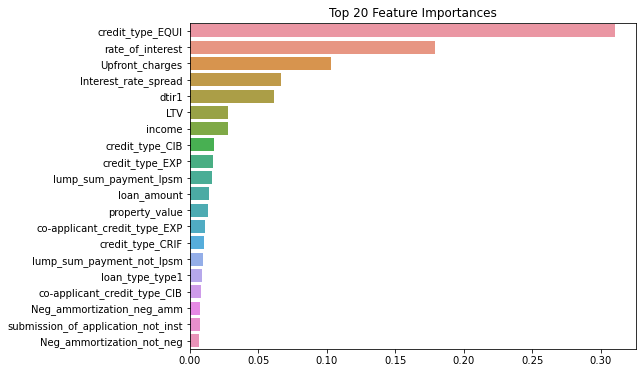

<Figure size 432x288 with 0 Axes>

In [18]:
import seaborn as sns
%matplotlib inline

dt_importances_values = model.feature_importances_
dt_importances = pd.Series(dt_importances_values, index = x_train.columns)
dt_top20 = dt_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=dt_top20, y=dt_top20.index)
plt.show()
save_name = 'graph/'+'rf_model'+'_feature importances.png'
plt.savefig(save_name)